### Klasifikasi Data Penguin menggunakan Algoritma Decision Tree dan Naive Bayes

In [3]:
# Library utama
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Lib data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Lib supervised learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Lib evaluation model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# pip install streamlit-aggrid

### Step 1. Akuisisi Data

In [5]:
dataset = sns.load_dataset("penguins")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Step 2. Exploration Data Analysis

#### 2.1. Cek Missing Value

In [7]:
# 2.1.1. Cek Missing Value
dataset.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# 2.1.2. Cek NaN value
dataset.isna().sum().reset_index()

,index,0
0,species,0
1,island,0
2,bill_length_mm,2
3,bill_depth_mm,2
4,flipper_length_mm,2
5,body_mass_g,2
6,sex,11


In [9]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### 2.2. Pembersihan Data

In [10]:
# 2.2.1. Proses membersihkan data
dataset = dataset.ffill()
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
# 2.2.2. Cek Missing Value
dataset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
# 2.1.1. Cek Missing Value
dataset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### 2.3. Visualisasi Data

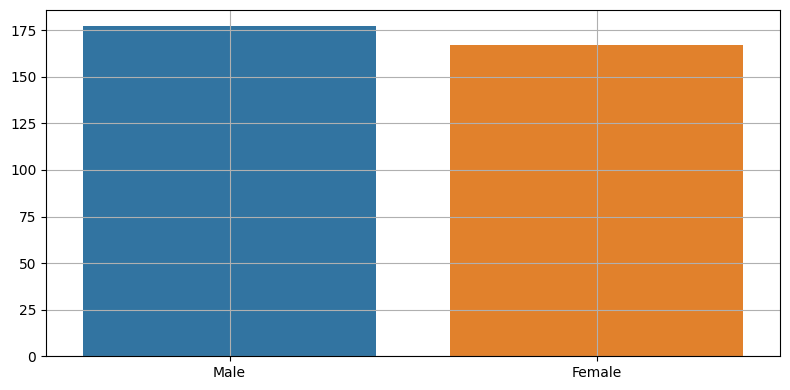

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=dataset, x="sex", hue="sex")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
df = dataset["sex"].value_counts().reset_index()

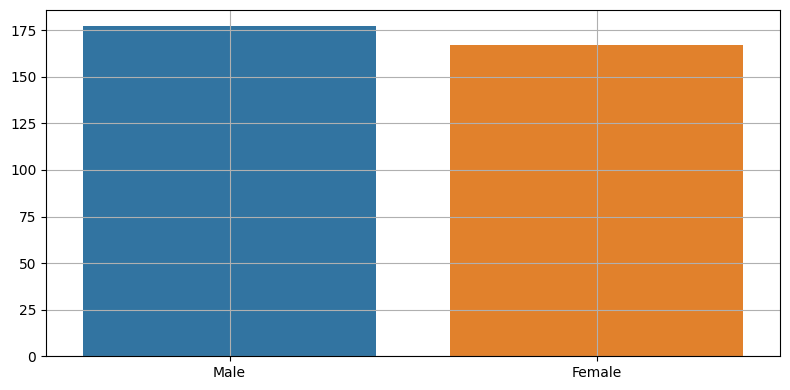

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="sex", y="count", hue="sex")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [16]:
df = dataset.groupby(by=["species", "sex"]).size().reset_index(name="jumlah")
df

,species,sex,jumlah
0,Adelie,Female,74
1,Adelie,Male,78
2,Chinstrap,Female,34
3,Chinstrap,Male,34
4,Gentoo,Female,59
5,Gentoo,Male,65


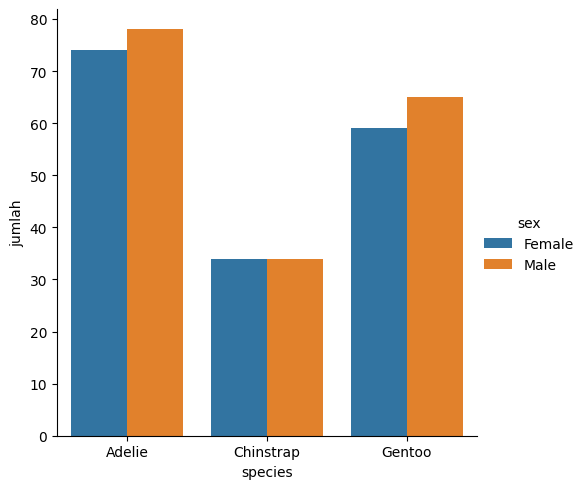

In [17]:
sns.catplot(data=df, kind="bar", x="species", y="jumlah", hue="sex")

In [18]:
df = dataset.groupby(by=["species", "island"]).size().reset_index(name="jumlah")
df

,species,island,jumlah
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


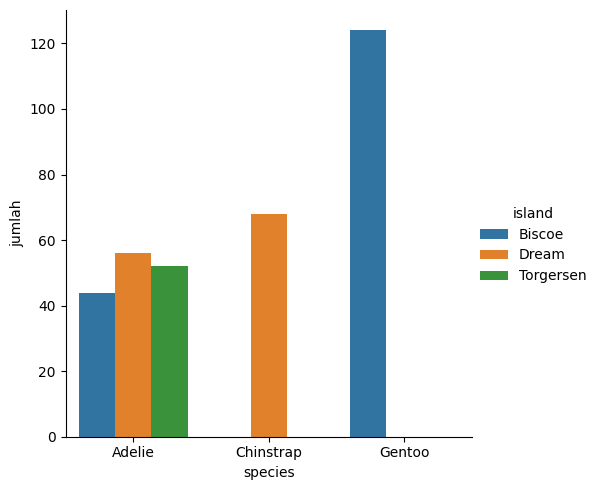

In [19]:
sns.catplot(data=df, kind="bar", x="species", y="jumlah", hue="island")

In [20]:
df = dataset.groupby(by=["sex", "island"]).size().reset_index(name="jumlah")
df

,sex,island,jumlah
0,Female,Biscoe,81
1,Female,Dream,61
2,Female,Torgersen,25
3,Male,Biscoe,87
4,Male,Dream,63
5,Male,Torgersen,27


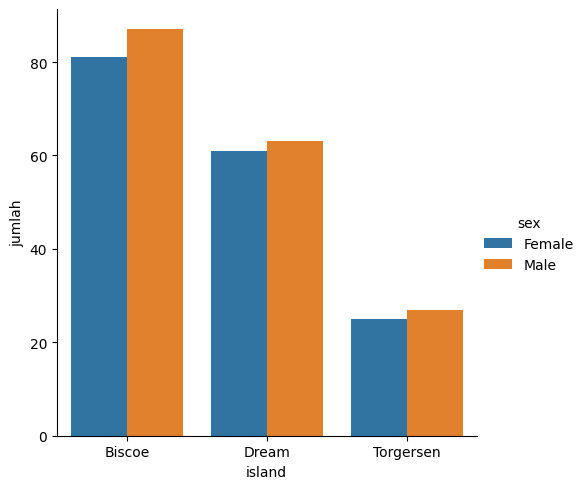

In [21]:
sns.catplot(data=df, kind="bar", x="island", y="jumlah", hue="sex")

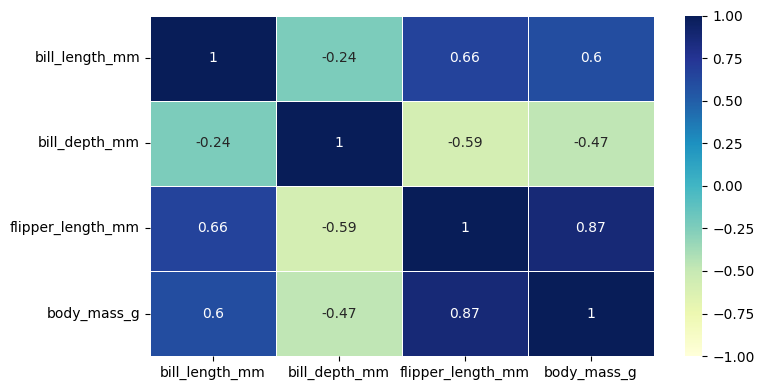

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataset.corr(numeric_only=True), vmin = -1, vmax = 1, center = 0, cmap="YlGnBu", annot=True, linewidths=0.5)

# ax.set_title("", fontsize=14)
# ax.set_xlabel("", fontsize=12)
# ax.set_ylabel("", fontsize=12)
# ax.grid(True)

plt.tight_layout()
plt.show()

### Step 3. Praproses Data

- Cek Unique Value

In [23]:
dataset["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [24]:
dataset["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [25]:
dataset["species"] = dataset['species'].replace({
    'Adelie':0, 'Chinstrap':1, 'Gentoo':2
})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3460\3244316425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["species"] = dataset['species'].replace({


In [26]:
dataset["island"] = dataset['island'].replace({
    'Torgersen':0, 'Biscoe':1, 'Dream':2
})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3460\2794852285.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["island"] = dataset['island'].replace({


- Set Features & Target

In [27]:
# Feature
x = dataset[["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values
y = dataset["sex"].values

- Pembagian Data Latih & Data Uji

In [28]:
# Split Validation
trainX, testX, trainY, testY = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=7, shuffle=True)

In [29]:
# Show dimension of data train
print(trainX.shape, trainY.shape)

(275, 6) (275,)


In [30]:
# Show dimension of data test
print(testX.shape, testY.shape)

(69, 6) (69,)


### Step 4. Model Klasifikasi KNN & NB

In [31]:
Proses_KNN = KNeighborsClassifier(n_neighbors=2).fit(trainX, trainY)

In [32]:
Hasil_KNN = Proses_KNN.predict(testX)
Hasil_KNN

array(['Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male'], dtype=object)

In [33]:
confusion_KNN = confusion_matrix(testY, Hasil_KNN)
confusion_KNN

array([[30,  4],
       [13, 22]], dtype=int64)

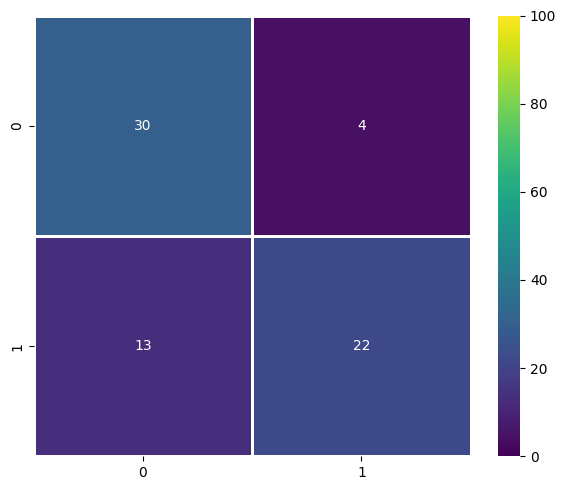

In [34]:

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(confusion_KNN, cmap="viridis", annot=True, linewidths=1, vmin=0, vmax=100)
plt.tight_layout()
plt.show()


In [35]:
print(classification_report(y_true=testY, y_pred=Hasil_KNN))

              precision    recall  f1-score   support

      Female       0.70      0.88      0.78        34
        Male       0.85      0.63      0.72        35

    accuracy                           0.75        69
   macro avg       0.77      0.76      0.75        69
weighted avg       0.77      0.75      0.75        69



In [36]:
Hasil_NB = GaussianNB().fit(trainX, trainY).predict(testX)
Hasil_NB

array(['Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male'], dtype='<U6')

In [37]:
confusion_NB = confusion_matrix(testY, Hasil_NB)
confusion_NB

array([[26,  8],
       [ 8, 27]], dtype=int64)

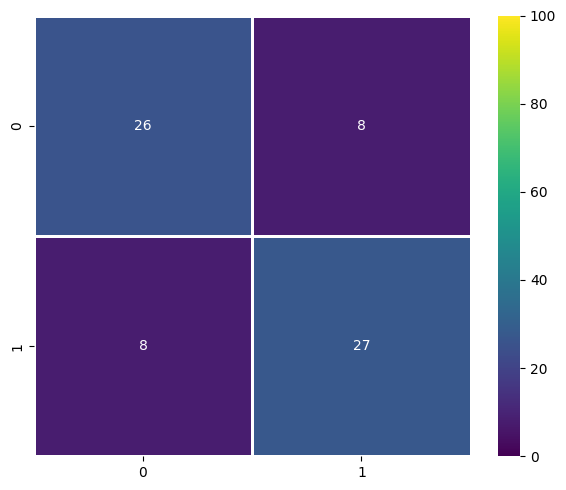

In [38]:

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(confusion_NB, cmap="viridis", annot=True, linewidths=1, vmin=0, vmax=100)
plt.tight_layout()
plt.show()

In [39]:
print(classification_report(y_true=testY, y_pred=Hasil_NB))

              precision    recall  f1-score   support

      Female       0.76      0.76      0.76        34
        Male       0.77      0.77      0.77        35

    accuracy                           0.77        69
   macro avg       0.77      0.77      0.77        69
weighted avg       0.77      0.77      0.77        69



### Step 5. Evaluasi Model

In [40]:
print("Akurasi Naive Bayes : "+str(np.round(accuracy_score(testY, Hasil_NB), 4)))
print("Akurasi K-Nearest Neighbors : "+str(np.round(accuracy_score(testY, Hasil_KNN), 4)))

Akurasi Naive Bayes : 0.7681
Akurasi K-Nearest Neighbors : 0.7536
